In [8]:
import random
import numpy as np
import math
import time
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse as sp
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches


In [2]:

v_num = 100
e_num = 500


Graph is ready
Dijkstra time =  588860.0 ns
Bellman Ford time =  1740290.0 ns
BF/D =  2.9553544136127434


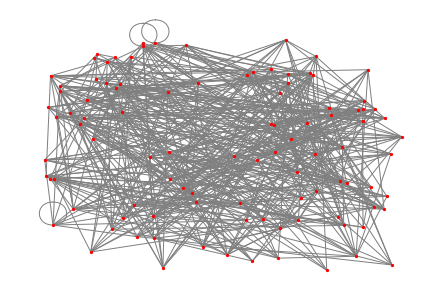

In [3]:

if __name__ == '__main__':
    # problem 1

    # matrix creation
    g_mat = np.zeros([v_num, v_num])
    new_edges = 0
    while new_edges < e_num:
        i = random.randint(0, v_num - 1)
        j = random.randint(0, v_num - 1)
        if g_mat[i, j] == 0: # if path doesn't exist yet
            w = np.random.randint(100)
            g_mat[i, j] = w
            g_mat[j, i] = w
            new_edges += 1
    
    # Prepare weighted matrix for graph
    def get_matrix_triad(coo_matrix, data=False):
        if not sp.isspmatrix_coo(coo_matrix):
            coo_matrix = sp.coo_matrix(coo_matrix)
        temp = np.vstack((coo_matrix.row, coo_matrix.col, coo_matrix.data)).transpose()
        return temp.tolist()
    
    edags = get_matrix_triad(g_mat)
    
    G = nx.Graph()
    H = nx.path_graph(g_mat.shape[0])
    G.add_nodes_from(H)
    G.add_weighted_edges_from(edags)
    print('Graph is ready')
    
    start = random.randint(0, v_num - 1)
    
    d_time = 0
    b_time = 0
    
    for finish in range(10):
        time1 = time.perf_counter_ns()
        d_path = nx.single_source_dijkstra(G, start)
        time2 = time.perf_counter_ns()
        b_path = nx.single_source_bellman_ford(G, start)
        time3 = time.perf_counter_ns()
        d_time += time2 - time1
        b_time += time3 - time2
    
    print('Dijkstra time = ', d_time / 10, 'ns')
    print('Bellman Ford time = ', b_time / 10, 'ns')
    print('BF/D = ', b_time / d_time)
    
    nx.draw(G, pos=nx.random_layout(G), node_color='red', edge_color='grey', node_size=5)
    
    plt.show()


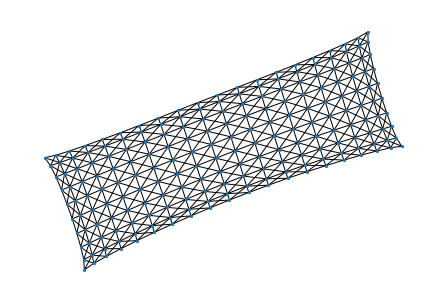

Obstacle cells


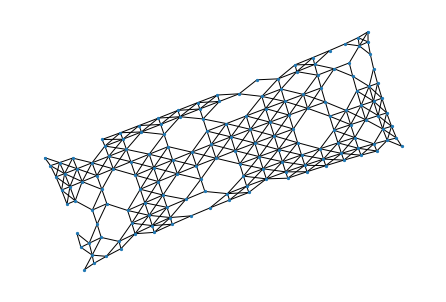

In [21]:

    # problem 2

    # Prepare grid graph

    def heuristic(point1, point2):
        h = math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)
        return h

    vert_ken = 10
    hor_len = 20

    G = nx.grid_2d_graph(vert_ken, hor_len)  #grid
    # Add diaginal edges
    G.add_edges_from([
        ((x, y), (x+1, y+1))
        for x in range(9)
        for y in range(19)
    ] + [
        ((x+1, y), (x, y+1))
        for x in range(9)
        for y in range(19)
    ], weight=1.4)

    pos = nx.spring_layout(G, iterations=1000, seed=2)
    nx.draw(G, pos, node_size=5)
    plt.show()

    # Obstacle cells 
    removed = []
    while (len(removed) < 40):
        point = (random.randint(0,9), random.randint(0,19))
        if point not in removed:
            removed.append(point)
    
    G.remove_nodes_from(removed)
    print("Obstacle cells")

    nx.draw(G, pos, node_size=5)
    plt.show()
    


from  (8, 15) to (2, 14)
[(8, 15), (7, 15), (6, 15), (5, 15), (4, 15), (3, 15), (2, 14)]
from  (0, 3) to (6, 12)
[(0, 3), (1, 4), (2, 5), (3, 6), (4, 7), (4, 8), (5, 9), (5, 10), (6, 11), (6, 12)]
from  (3, 10) to (7, 0)
[(3, 10), (4, 9), (4, 8), (4, 7), (5, 6), (5, 5), (6, 4), (6, 3), (6, 2), (7, 1), (7, 0)]
from  (2, 16) to (9, 18)
[(2, 16), (3, 16), (4, 16), (5, 17), (6, 17), (7, 17), (8, 18), (9, 18)]
from  (3, 16) to (6, 11)
[(3, 16), (4, 15), (5, 14), (5, 13), (6, 12), (6, 11)]


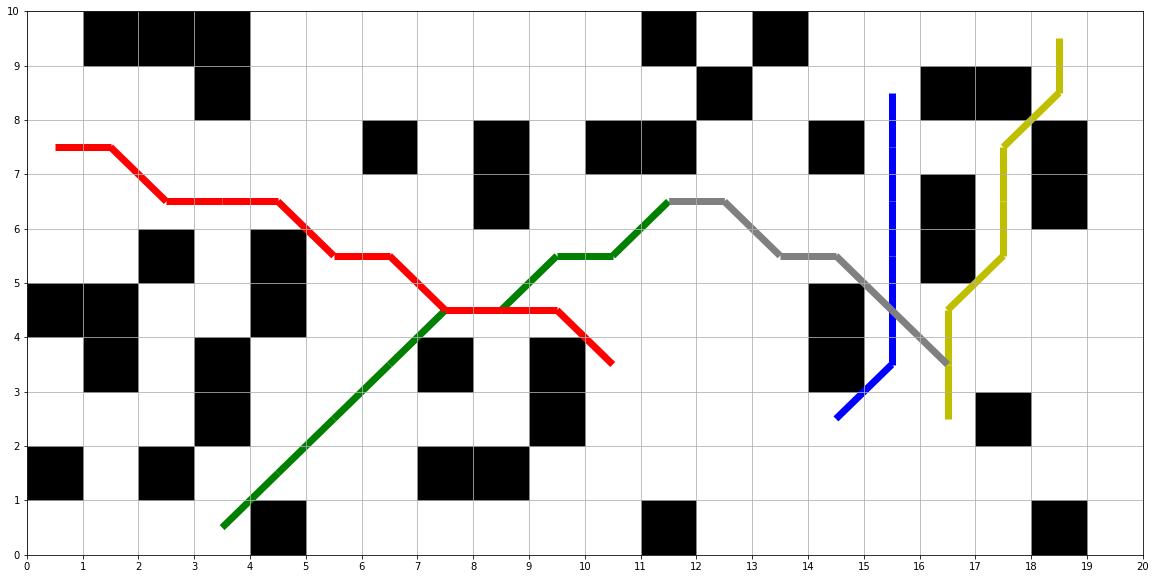

In [32]:

# Print astar results

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

colorlist = ['b', 'g', 'r', 'y', 'grey']

# Prepare lists for drawing (swap x and y to make plot horisontal)
removed_lst_1 = [it[1]-0.5 for it in removed]
removed_lst_2 = [it[0]-0.5 for it in removed]

# Fill obstacle rectangles
z=0 
while z < (len(removed)):
    patch1 = patches.Rectangle((removed_lst_1[z], removed_lst_2[z]), 1, 1, edgecolor = 'black', facecolor = 'black', fill=True)
    ax.add_patch(patch1)
    z+=1

i = 0
while i < 5:
    while 1:
        point1 = (random.randint(0, vert_ken-1), random.randint(0, hor_len-1))
        point2 = (random.randint(0, vert_ken-1), random.randint(0, hor_len-1))
        if (point1 not in removed) and (point2 not in removed):
            break
    print("from ",point1, "to", point2)
    path = nx.astar_path(G, point1, point2, heuristic)
    print(path)
    # swap x and y to make plot horisontal
    path_xy_swaped = [(node[1], node[0]) for node in path]

    j=0
    while j < (len(path_xy_swaped)-1):
        verts = [
                path_xy_swaped[j],
                path_xy_swaped[j+1]
                ]
        codes = [Path.MOVETO,
                Path.LINETO]
        path_for_plt = Path(verts, codes)
        patch = patches.PathPatch(path_for_plt, facecolor=colorlist[i], edgecolor=colorlist[i], lw=7)
        ax.add_patch(patch)
        j+=1
    i += 1


plt.grid()
ax.set_yticks(np.arange(-0.5, 10.5, 1))
ax.set_xticks(np.arange(-0.5, 20.5, 1))
ax.set_yticklabels(np.arange(0, 11, 1))
ax.set_xticklabels(np.arange(0, 21, 1))
plt.draw()
plt.show()

